# Plot Based Movie Recommender
DataSet:
 - This dataset is from [Open Movie Database](http://www.omdbapi.com/)
 - It was downloaded from their website using the APIs provided
 - We have roughly 65K movies and their attributes such as rating, vote count and actors etc.
 
Objective:
 - Build a plot based movie recommender that recommends movies based on a similarity score of plots
 - User inputs a movie name and similar movies based on similarity score are recommended

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from skimage import io

In [2]:
temp = pd.read_json('movies.json')

In [3]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62423 entries, 0 to 62422
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         62416 non-null  object
 1   Year          62418 non-null  object
 2   Rated         62418 non-null  object
 3   Released      62418 non-null  object
 4   Runtime       62418 non-null  object
 5   Genre         62418 non-null  object
 6   Director      62418 non-null  object
 7   Writer        62418 non-null  object
 8   Actors        62418 non-null  object
 9   Plot          62418 non-null  object
 10  Language      62418 non-null  object
 11  Country       62418 non-null  object
 12  Awards        62418 non-null  object
 13  Poster        62418 non-null  object
 14  Ratings       62418 non-null  object
 15  Metascore     62418 non-null  object
 16  imdbRating    62418 non-null  object
 17  imdbVotes     62418 non-null  object
 18  imdbID        62418 non-null  object
 19  Type

We will be using Title and Plot for our recommender system. Poster is needed to present the result in a nice format

In [4]:
movies = temp[['Title','Plot', 'Poster']]

Lets check if we have any Nan's

In [5]:
movies.isnull().sum(axis=0)

Title     7
Plot      5
Poster    5
dtype: int64

In [6]:
movies[movies.Title.isnull()==True]

,Title,Plot,Poster
971,None,"As a young boy, Richard was fascinated with sc...",https://m.media-amazon.com/images/M/MV5BYzYxZj...
50104,None,None,None
50105,None,None,None
57381,None,None,None
59805,None,None,None
59996,None,None,None
60435,None,"Reflecting on meaning of life, the hero of the...",N/A


Let's get rid of these

In [7]:
indices_to_drop = movies[movies.Title.isnull()==True].index
movies = movies.drop(axis='index', index=indices_to_drop)
movies.reset_index(inplace=True)
movies.isnull().sum(axis=0)

index     0
Title     0
Plot      0
Poster    0
dtype: int64

All good!

In [8]:
movies.head()

,index,Title,Plot,Poster
0,0,Toy Story,A little boy named Andy loves to be in his roo...,https://m.media-amazon.com/images/M/MV5BMDU2ZW...
1,1,Jumanji,After being trapped in a jungle board game for...,https://m.media-amazon.com/images/M/MV5BZTk2Zm...
2,2,Grumpier Old Men,Things don't seem to change much in Wabasha Co...,https://m.media-amazon.com/images/M/MV5BMjQxM2...
3,3,Waiting to Exhale,This story based on the best selling novel by ...,https://m.media-amazon.com/images/M/MV5BYzcyMD...
4,4,Father of the Bride Part II,"In this sequel to ""Father of the Bride"", Georg...",https://m.media-amazon.com/images/M/MV5BOTEyNz...


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

#remove all non-essential words (a, the, was etc.)
tfidf = TfidfVectorizer(stop_words='english')

#create tfidf matrix
tfidf_matrix = tfidf.fit_transform(movies['Plot'])

tfidf_matrix.shape

(62416, 93530)

In [10]:
# Memory usage is too high and my computer cannot calculate cosine similarities when features are stacked horizontally totalling up to 200K features
# from scipy import sparse
# feature_matrix = sparse.hstack([tfidf_matrix, count_matrix])
# feature_matrix.shape
# I can probably calculate by writing to disk but that something I will do later

In [11]:
from sklearn.metrics.pairwise import cosine_similarity

#Calculate tfidf cosine similarity
tfidf_cosine_sim = cosine_similarity(tfidf_matrix)

In [12]:
def get_recommended_movies(title, cosine_sim = tfidf_cosine_sim):
    idx = movies[movies.Title==title].index  
    if len(idx)==0:
        print('Matching movie not found')         
    else:        
        scores = list(cosine_sim[idx][0])
        scores = list(enumerate(scores))  
        scores = sorted(scores, key = lambda x:x[1], reverse=True)   
        scores = scores[1:11]
        movie_idx = [i[0] for i in scores]    
        return movie_idx

In [13]:
def display_recommended_movies(movie_idx):    
    plt.figure(figsize = (20, 10))
    gs = gridspec.GridSpec(2, 5)
    gs.update(wspace=0.01, hspace=0.18)
    for i, j in enumerate(movie_idx):     
        try:
            image = io.imread(movies.iloc[j]['Poster'])
        except:
            image = io.imread('posters/image_not_found.png')
        ax = plt.subplot(gs[i])
        ax.imshow(image)
        ax.set_ylabel(movies.iloc[j]['Title'])         
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

Enter a movie that you like? GoldenEye


You entered: GoldenEye


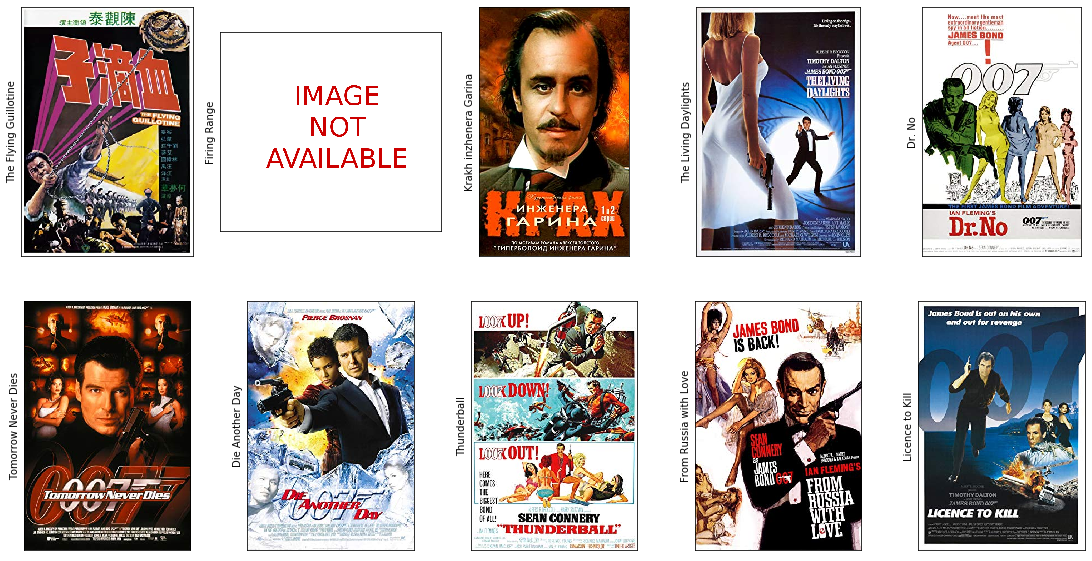

In [17]:
val = input("Enter a movie that you like?")
print('You entered: '+ val)
display_recommended_movies(get_recommended_movies(val))